In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Setting matplotlib defaults
plt.rc('figure', figsize=(8, 5), dpi=120)

plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=15, titlepad=10)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-jack-smart-effect-of-removal-ml/sample_submission.csv
/kaggle/input/black-jack-smart-effect-of-removal-ml/train.csv
/kaggle/input/black-jack-smart-effect-of-removal-ml/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/black-jack-smart-effect-of-removal-ml/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/black-jack-smart-effect-of-removal-ml/test.csv', index_col='id')

# Data Understanding

In [3]:
train.head(10)

,1,2,3,4,5,6,7,8,9,10,ev
id,,,,,,,,,,,
0,12,6,16,11,14,14,15,20,11,61,-0.037038
1,7,6,7,6,10,10,9,10,5,30,-0.019283
2,9,9,5,8,9,8,7,7,7,31,-0.024862
3,13,16,12,10,12,14,12,12,11,48,-0.023246
4,7,8,8,9,11,10,5,12,8,42,-0.025703
5,7,7,5,8,6,8,9,9,9,32,-0.032025
6,2,2,2,1,4,2,4,6,2,15,-0.029387
7,2,2,0,0,4,1,1,2,2,6,-0.024910
8,18,13,16,15,14,17,17,14,16,60,-0.030389


In [4]:
train.shape

(20500, 11)

In [5]:
test.shape

(8655, 10)

In [6]:
train.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
ev    0
dtype: int64

In [7]:
test.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [8]:
train.describe()

,1,2,3,4,5,6,7,8,9,10,ev
count,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000
mean,7.591756,7.601073,7.597951,7.577659,7.598439,7.592683,7.552049,7.568878,7.602439,30.334634,-0.023383
std,4.809277,4.771329,4.799255,4.764657,4.790892,4.796563,4.754059,4.773905,4.766625,17.658349,0.010041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.071232
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,15.000000,-0.029104
50%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,28.000000,-0.024109
75%,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,44.000000,-0.018508
max,22.000000,22.000000,22.000000,21.000000,22.000000,22.000000,22.000000,22.000000,22.000000,74.000000,0.044198


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


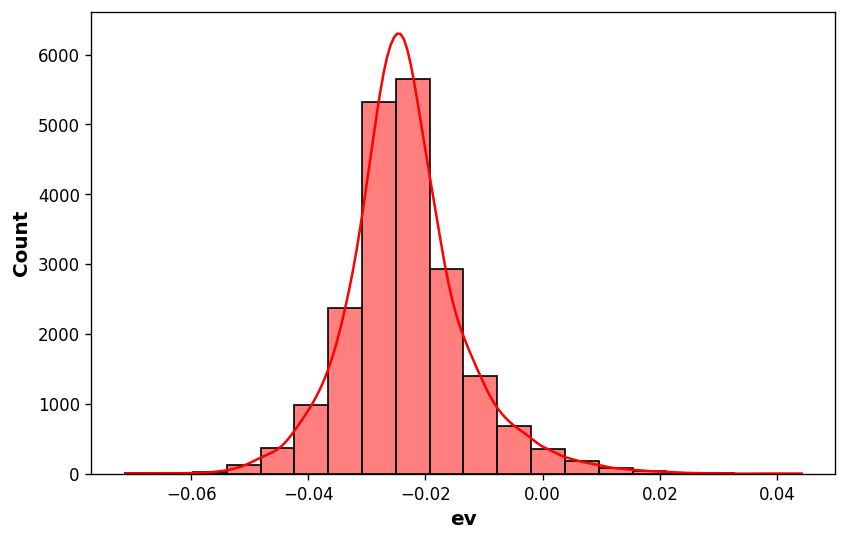

In [9]:
sns.histplot(x='ev', data=train, bins=20, kde=True, color='red')
plt.show()

<Axes: >

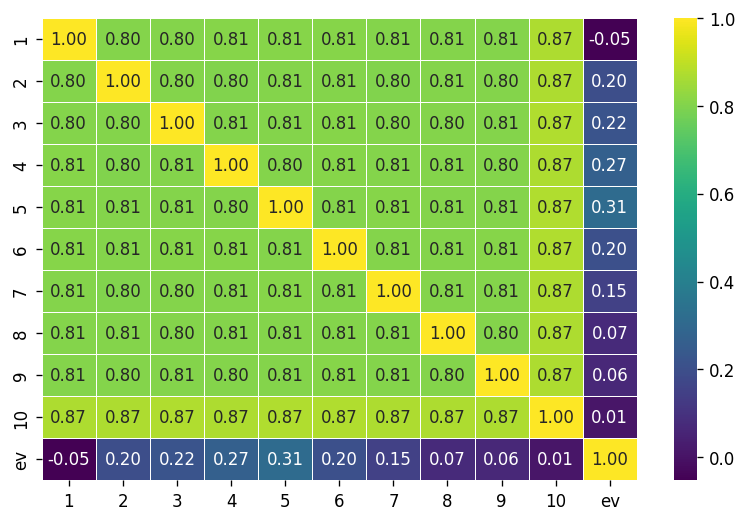

In [10]:
sns.heatmap(train.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [11]:
from sklearn.model_selection import train_test_split, KFold

X = train.copy()
y = X.pop('ev')
X_test = test.copy()

kf = KFold(n_splits=10, shuffle=True, random_state=34)
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=34)
for train_index, valid_index in kf.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]


In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor(random_state=34).fit(X_train, y_train, verbose=0)

xgb_pred = xgb.predict(X_valid)
print(f'MSE: {mean_squared_error(y_valid, xgb_pred)}')

MSE: 4.065527521575035e-06


In [13]:
test_pred = xgb.predict(X_test)
sub = pd.read_csv('/kaggle/input/black-jack-smart-effect-of-removal-ml/sample_submission.csv')
sub['ev'] = test_pred
sub.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
